## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [5]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [6]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [7]:
data.isnull().sum() #Пропусков в данных нет, так как в каждой колонке мы нашли 0 null-ов

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

### Разделение признаков

Исходя из описания данных по ссылке, можем сделать следующие выводы о признаках:

status - категориальный

duration - количественный

credit_history - категориальный

purpose - категориальный

amount  - количественный

savings - категориальный

employment_duration - порядковый

installment_rate - порядковый. Бывает 20 <= ... < 25, 25 <= ... < 35, < 20, >= 35

personal_status_sex - категориальный

other_debtors - категориальный

present_residence - порядковый. Бывает 1 <= ... < 4 yrs	, 4 <= ... < 7 yrs	, < 1 yr, >= 7 yrs

property - категориальный

age  - количественный

other_installment_plans - категориальный

housing - категориальный

number_credits - порядковый. Бывает 1, 2-3, 4-5, >=6

job - категориальный

people_liable - порядковый. Бывает "0 to 2", "3 or more"

telephone   - бинарный. Бывает no, yes (under customer name)

foreign_worker - Бинарный. Бывает no, yes

credit_risk - бинарный. Бывает bad, good

In [8]:
data.groupby(['other_installment_plans']).mean()

,duration,amount,age
other_installment_plans,,,
bank,22.136691,3619.129496,36.482014
none,20.457002,3161.030713,35.402948
stores,24.978723,4151.276596,35.170213


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [9]:
data.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [10]:
(data[data['age'] < 30]['housing'] == 'rent').mean() * 100 # ответ в %

66.66666666666666

In [11]:
(data[data['age'] > 40]['housing'] == 'rent').mean() * 100 # ответ в %

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [12]:
(data[data['foreign_worker'] == 'yes']['number_credits'].isin(['4-5', '>=6'])).sum()

1

### Задание 6 (1 балл)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

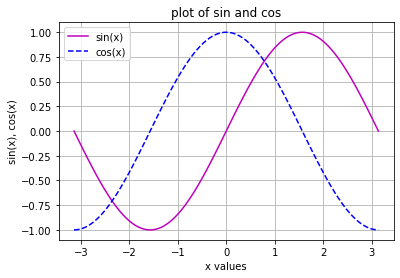

In [14]:
# your code here
x = np.linspace(-1*np.pi,np.pi, 100)
y_sin = np.sin(x)
y_cos = np.cos(x)

plt.plot(x, y_sin, color='m')
plt.plot(x, y_cos, color='b', ls='dashed')

plt.xlabel('x values')
plt.ylabel('sin(x), cos(x)')
plt.title('plot of sin and cos')
plt.legend(['sin(x)', 'cos(x)'])
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

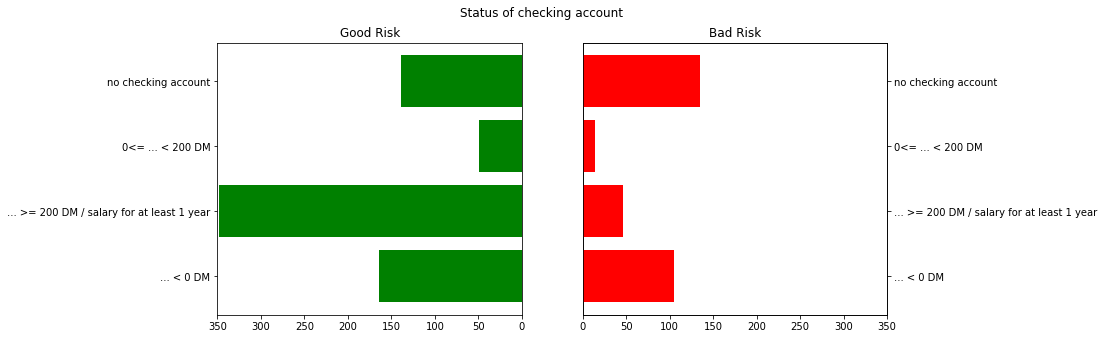

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle('Status of checking account')

axs[0].set_title('Good Risk')
axs[0].set_xlim(350, 0)
counts = data[data['credit_risk'] == 'good']['status'].value_counts().sort_index()
axs[0].barh(sorted(counts.index), counts, color='green')

axs[1].set_yticks([])
axs[1] = axs[1].twinx()
axs[1].set_title('Bad Risk')
axs[1].set_xlim(0, 350)
counts = data[data['credit_risk'] == 'bad']['status'].value_counts().sort_index()

axs[1].barh(sorted(counts.index), counts, color='red')

plt.show()


### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [17]:
sns.histplot(data=data, x="status", hue="credit_risk'", multiple="dodge", shrink=.8)

AttributeError: module 'seaborn' has no attribute 'histplot'

In [15]:
!conda search -f seaborn

Loading channels: ...working... done
# Name                       Version           Build  Channel             
seaborn                        0.8.0  py27h5729117_0  pkgs/main           
seaborn                        0.8.0  py35hda3c85b_0  pkgs/main           
seaborn                        0.8.0  py36h62cb67c_0  pkgs/main           
seaborn                        0.8.1          py27_0  pkgs/main           
seaborn                        0.8.1  py27hab56d54_0  pkgs/main           
seaborn                        0.8.1          py35_0  pkgs/main           
seaborn                        0.8.1  py35hc73483e_0  pkgs/main           
seaborn                        0.8.1          py36_0  pkgs/main           
seaborn                        0.8.1  py36h9b69545_0  pkgs/main           
seaborn                        0.8.1          py37_0  pkgs/main           
seaborn                        0.9.0          py27_0  pkgs/main           
seaborn                        0.9.0          py35_0  pkgs/main

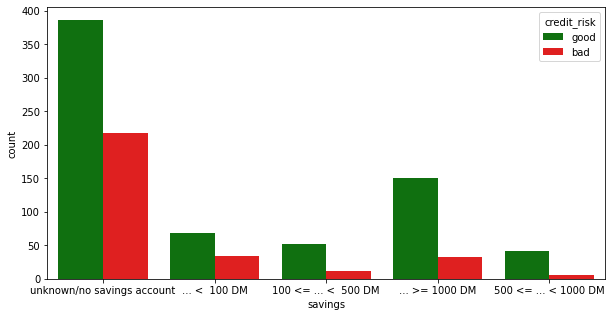

In [11]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

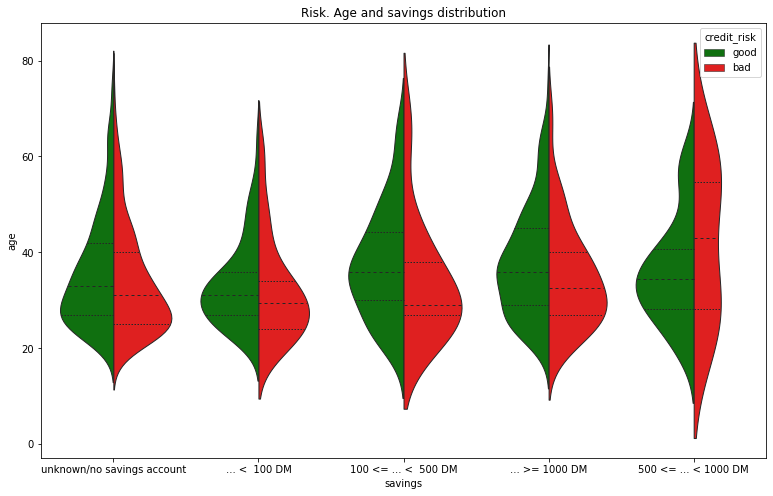

In [26]:
plt.figure(figsize=(13, 8))
plt.title('Risk. Age and savings distribution')
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk",
               split=True, inner="quart", linewidth=1,
               palette={"good": "g", "bad": "r"})
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

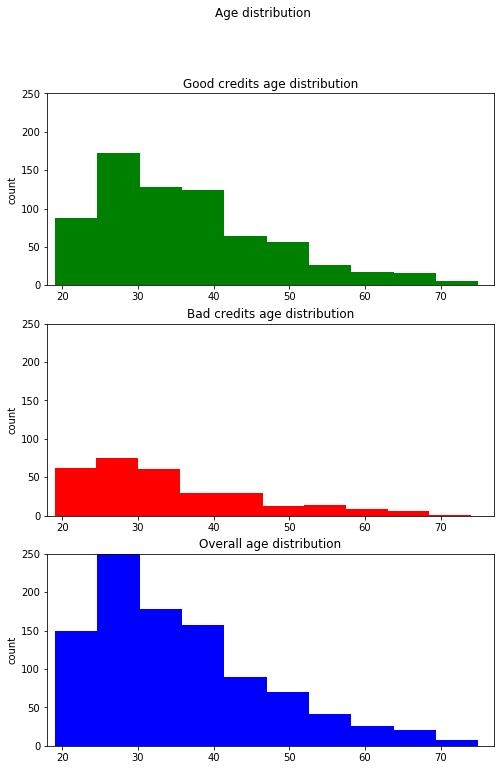

In [48]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

fig.suptitle('Age distribution')

axs[0].set_title('Good credits age distribution')
axs[0].set_xlim(18, 77)
axs[0].set_ylim(0, 250)
axs[0].set_ylabel("count")
axs[0].hist(data[data['credit_risk'] == 'good']['age'], color='green')

axs[1].set_title('Bad credits age distribution')
axs[1].set_xlim(18, 77)
axs[1].set_ylim(0, 250)
axs[1].set_ylabel("count")
axs[1].hist(data[data['credit_risk'] == 'bad']['age'], color='red')

axs[2].set_title('Overall age distribution')
axs[2].set_xlim(18, 77)
axs[2].set_ylim(0, 250)
axs[2].set_ylabel("count")
axs[2].hist(data['age'], color='blue')

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

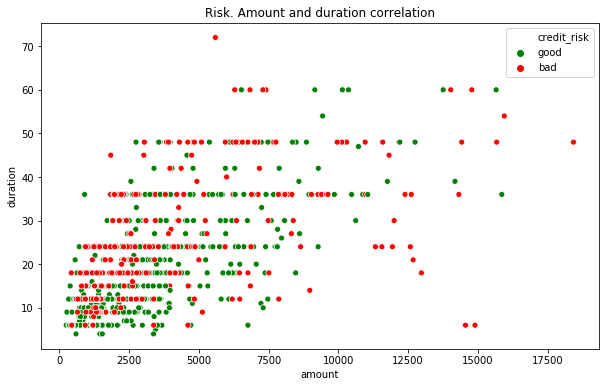

In [64]:
plt.figure(figsize=(10, 6))
plt.title('Risk. Amount and duration correlation')
sns.scatterplot(x="amount", y="duration",
                hue="credit_risk",
                palette=['g','r'],
                data=data)
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

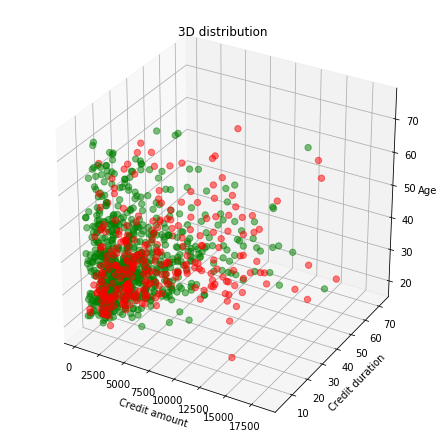

In [75]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
c = np.where(
    data['credit_risk'] == 'good', 'g', 'r'
)
sc = ax.scatter(data['amount'], data['duration'], data['age'], s=40, marker='o', c=c, alpha=0.5)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Credit duration')
ax.set_zlabel('Age')
ax.set_title('3D distribution')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [16]:
# your code here

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))